In [ ]:
from google.colab import drive
import os

drive.mount('/content/drive')
path = '/content/drive/MyDrive/shape_dataset'
os.listdir(path)

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

# =========================
# PARAMETER
# =========================
IMG_SIZE = (56, 56)
BATCH_SIZE = 20
EPOCHS = 100

TRAIN_DIR = path + '/train224'
TEST_DIR  = path + '/test224'

# =========================
# DATA GENERATOR (AUGMENTASI AKTIF)
# =========================
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    TRAIN_DIR,
    target_size=IMG_SIZE,
    color_mode="grayscale",
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    shuffle=True
)

val_generator = test_datagen.flow_from_directory(
    TEST_DIR,
    target_size=IMG_SIZE,
    color_mode="grayscale",
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    shuffle=False
)

NUM_CLASSES = train_generator.num_classes
print("Jumlah kelas:", NUM_CLASSES)

# =========================
# MODEL CNN (1 CHANNEL)
# =========================
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(56,56,1)),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),

    Dense(NUM_CLASSES, activation='softmax')
])

# =========================
# COMPILE
# =========================
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

# =========================
# CALLBACK (SAVE KE DRIVE)
# =========================
checkpoint = ModelCheckpoint(
    filepath="/content/drive/MyDrive/shape_dataset/best_model_grayscale_aug.h5",
    monitor="val_accuracy",
    save_best_only=True,
    verbose=1
)

early_stop = EarlyStopping(
    monitor="val_loss",
    patience=10,
    restore_best_weights=True
)

# =========================
# TRAINING
# =========================
history = model.fit(
    train_generator,
    epochs=EPOCHS,
    validation_data=val_generator,
    callbacks=[checkpoint]
)

print("Training selesai. Model terbaik tersimpan di Google Drive.")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Found 75 images belonging to 5 classes.
Found 25 images belonging to 5 classes.
Jumlah kelas: 5


Model: "sequential_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_45 (Conv2D)              │ (None, 54, 54, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_45 (MaxPooling2D) │ (None, 27, 27, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_46 (Conv2D)              │ (None, 25, 25, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_46 (MaxPooling2D) │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_47 (Conv2D)              │ (None, 10, 10, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_47 (MaxPooling2D) │ (None, 5, 5, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_15 (Flatten)            │ (None, 3200)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_30 (Dense)                │ (None, 256)            │       819,456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ (None, 5)              │         1,285 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 913,413 (3.48 MB)

 Trainable params: 913,413 (3.48 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step - accuracy: 0.1628 - loss: 1.6774
Epoch 1: val_accuracy improved from -inf to 0.20000, saving model to /content/drive/MyDrive/shape_dataset/best_model_grayscale_aug.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 726ms/step - accuracy: 0.1649 - loss: 1.6764 - val_accuracy: 0.2000 - val_loss: 1.6102
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step - accuracy: 0.1379 - loss: 1.6165
Epoch 2: val_accuracy did not improve from 0.20000
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 206ms/step - accuracy: 0.1423 - loss: 1.6159 - val_accuracy: 0.2000 - val_loss: 1.6094
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step - accuracy: 0.1424 - loss: 1.6097
Epoch 3: val_accuracy did not improve from 0.20000
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 210ms/step - accuracy: 0.1459 - loss: 1.6109 - val_accuracy: 0.2000 - val_loss: 1.6092
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step - accuracy: 0.2633 - loss: 1.6072
Epoch 4: val_accuracy did not improve from 0.20000
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 209ms/step - accuracy: 0.2480 - loss: 1.6085 - val_accuracy: 0.2000 - val_loss: 1.6094
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step - accuracy: 0.2292 - loss: 1.6173
Epoch 5: val_accuracy did not improve from 0.20

4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 570ms/step - accuracy: 0.1769 - loss: 1.6070 - val_accuracy: 0.3200 - val_loss: 1.6088
Epoch 15/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step - accuracy: 0.2110 - loss: 1.6052
Epoch 15: val_accuracy did not improve from 0.32000
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 235ms/step - accuracy: 0.2061 - loss: 1.6058 - val_accuracy: 0.2000 - val_loss: 1.6089
Epoch 16/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step - accuracy: 0.1967 - loss: 1.6086
Epoch 16: val_accuracy did not improve from 0.32000
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 206ms/step - accuracy: 0.1921 - loss: 1.6085 - val_accuracy: 0.2000 - val_loss: 1.6090
Epoch 17/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step - accuracy: 0.1974 - loss: 1.6084
Epoch 17: val_accuracy did not improve from 0.32000
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 196ms/step - accuracy: 0.2086 - loss: 1.6083 - val_accuracy: 0.2000 - val_loss: 1.6096
Epoch 18/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step - accuracy: 0.1704 - loss: 1.6140
Epoch 18: val_accuracy did not improve f

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 236ms/step - accuracy: 0.1310 - loss: 1.6106 - val_accuracy: 0.3600 - val_loss: 1.6092
Epoch 21/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step - accuracy: 0.2295 - loss: 1.6071
Epoch 21: val_accuracy did not improve from 0.36000
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 194ms/step - accuracy: 0.2236 - loss: 1.6081 - val_accuracy: 0.2000 - val_loss: 1.6086
Epoch 22/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step - accuracy: 0.1171 - loss: 1.6128
Epoch 22: val_accuracy did not improve from 0.36000
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 203ms/step - accuracy: 0.1256 - loss: 1.6125 - val_accuracy: 0.2000 - val_loss: 1.6086
Epoch 23/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step - accuracy: 0.2988 - loss: 1.6075
Epoch 23: val_accuracy did not improve from 0.36000
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 330ms/step - accuracy: 0.2870 - loss: 1.6078 - val_accuracy: 0.2000 - val_loss: 1.6085
Epoch 24/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 248ms/step - accuracy: 0.2191 - loss: 1.6094
Epoch 24: val_accuracy did not improve f

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 398ms/step - accuracy: 0.1613 - loss: 1.6132 - val_accuracy: 0.4400 - val_loss: 1.6063
Epoch 31/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step - accuracy: 0.1966 - loss: 1.6071
Epoch 31: val_accuracy did not improve from 0.44000
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 196ms/step - accuracy: 0.1973 - loss: 1.6068 - val_accuracy: 0.3600 - val_loss: 1.6041
Epoch 32/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step - accuracy: 0.2043 - loss: 1.6068
Epoch 32: val_accuracy did not improve from 0.44000
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 207ms/step - accuracy: 0.2088 - loss: 1.6069 - val_accuracy: 0.3200 - val_loss: 1.6032
Epoch 33/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step - accuracy: 0.2386 - loss: 1.6019
Epoch 33: val_accuracy did not improve from 0.44000
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 190ms/step - accuracy: 0.2309 - loss: 1.6039 - val_accuracy: 0.3200 - val_loss: 1.6006
Epoch 34/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step - accuracy: 0.1646 - loss: 1.6141
Epoch 34: val_accuracy did not improve f

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 234ms/step - accuracy: 0.2373 - loss: 1.6065 - val_accuracy: 0.5200 - val_loss: 1.5995
Epoch 36/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step - accuracy: 0.2936 - loss: 1.6011
Epoch 36: val_accuracy improved from 0.52000 to 0.56000, saving model to /content/drive/MyDrive/shape_dataset/best_model_grayscale_aug.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 298ms/step - accuracy: 0.3015 - loss: 1.6007 - val_accuracy: 0.5600 - val_loss: 1.5956
Epoch 37/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step - accuracy: 0.2207 - loss: 1.5940
Epoch 37: val_accuracy did not improve from 0.56000
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 344ms/step - accuracy: 0.2272 - loss: 1.5939 - val_accuracy: 0.3600 - val_loss: 1.5881
Epoch 38/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step - accuracy: 0.2623 - loss: 1.6048
Epoch 38: val_accuracy did not improve from 0.56000
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 335ms/step - accuracy: 0.2552 - loss: 1.6094 - val_accuracy: 0.4800 - val_loss: 1.5862
Epoch 39/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step - accuracy: 0.2335 - loss: 1.6200
Epoch 39: val_accuracy did not improve from 0.56000
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 241ms/step - accuracy: 0.2348 - loss: 1.6177 - val_accuracy: 0.3600 - val_loss: 1.5834
Epoch 40/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step - accuracy: 0.2417 - loss: 1.6011
Epoch 40: val_accuracy did not improve f

4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 483ms/step - accuracy: 0.5936 - loss: 0.9340 - val_accuracy: 0.6000 - val_loss: 1.2948
Epoch 63/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step - accuracy: 0.4650 - loss: 1.0776
Epoch 63: val_accuracy did not improve from 0.60000
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 194ms/step - accuracy: 0.4707 - loss: 1.0765 - val_accuracy: 0.6000 - val_loss: 1.1604
Epoch 64/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step - accuracy: 0.5884 - loss: 1.0185
Epoch 64: val_accuracy did not improve from 0.60000
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 198ms/step - accuracy: 0.5800 - loss: 1.0224 - val_accuracy: 0.5600 - val_loss: 1.2054
Epoch 65/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step - accuracy: 0.5276 - loss: 1.0849
Epoch 65: val_accuracy did not improve from 0.60000
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 214ms/step - accuracy: 0.5314 - loss: 1.0837 - val_accuracy: 0.5600 - val_loss: 1.1989
Epoch 66/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step - accuracy: 0.6021 - loss: 0.9621
Epoch 66: val_accuracy did not improve f

4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 377ms/step - accuracy: 0.5003 - loss: 0.9404 - val_accuracy: 0.6400 - val_loss: 1.1518
Epoch 68/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 272ms/step - accuracy: 0.5938 - loss: 1.0219
Epoch 68: val_accuracy did not improve from 0.64000
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 330ms/step - accuracy: 0.5924 - loss: 1.0192 - val_accuracy: 0.6400 - val_loss: 1.3674
Epoch 69/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step - accuracy: 0.7117 - loss: 1.0079
Epoch 69: val_accuracy improved from 0.64000 to 0.68000, saving model to /content/drive/MyDrive/shape_dataset/best_model_grayscale_aug.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 211ms/step - accuracy: 0.7053 - loss: 1.0099 - val_accuracy: 0.6800 - val_loss: 1.3551
Epoch 70/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step - accuracy: 0.7244 - loss: 0.7837
Epoch 70: val_accuracy did not improve from 0.68000
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 173ms/step - accuracy: 0.7208 - loss: 0.8044 - val_accuracy: 0.6800 - val_loss: 1.3290
Epoch 71/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step - accuracy: 0.7300 - loss: 0.7315
Epoch 71: val_accuracy did not improve from 0.68000
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 202ms/step - accuracy: 0.7280 - loss: 0.7389 - val_accuracy: 0.6400 - val_loss: 1.4328
Epoch 72/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step - accuracy: 0.6691 - loss: 0.8672
Epoch 72: val_accuracy did not improve from 0.68000
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 215ms/step - accuracy: 0.6740 - loss: 0.8500 - val_accuracy: 0.6400 - val_loss: 1.5129
Epoch 73/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step - accuracy: 0.6611 - loss: 0.7405
Epoch 73: val_accuracy did not improve f

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 341ms/step - accuracy: 0.6265 - loss: 1.0036 - val_accuracy: 0.7200 - val_loss: 1.5111
Epoch 75/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step - accuracy: 0.6494 - loss: 0.7983
Epoch 75: val_accuracy did not improve from 0.72000
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 289ms/step - accuracy: 0.6608 - loss: 0.7884 - val_accuracy: 0.7200 - val_loss: 1.3492
Epoch 76/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step - accuracy: 0.6575 - loss: 0.7958
Epoch 76: val_accuracy did not improve from 0.72000
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 240ms/step - accuracy: 0.6620 - loss: 0.7944 - val_accuracy: 0.6800 - val_loss: 1.5202
Epoch 77/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step - accuracy: 0.7161 - loss: 0.8088
Epoch 77: val_accuracy did not improve from 0.72000
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 222ms/step - accuracy: 0.7196 - loss: 0.8134 - val_accuracy: 0.6800 - val_loss: 1.6154
Epoch 78/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step - accuracy: 0.7520 - loss: 0.6287
Epoch 78: val_accuracy did not improve f

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 219ms/step - accuracy: 0.7623 - loss: 0.6281 - val_accuracy: 0.7600 - val_loss: 1.6627
Epoch 80/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step - accuracy: 0.7020 - loss: 0.6517
Epoch 80: val_accuracy did not improve from 0.76000
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 339ms/step - accuracy: 0.6976 - loss: 0.6580 - val_accuracy: 0.7200 - val_loss: 1.7217
Epoch 81/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step - accuracy: 0.6158 - loss: 0.7959
Epoch 81: val_accuracy did not improve from 0.76000
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 317ms/step - accuracy: 0.6179 - loss: 0.7945 - val_accuracy: 0.7200 - val_loss: 1.7305
Epoch 82/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step - accuracy: 0.7070 - loss: 0.7467
Epoch 82: val_accuracy did not improve from 0.76000
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 317ms/step - accuracy: 0.7123 - loss: 0.7521 - val_accuracy: 0.7600 - val_loss: 1.4012
Epoch 83/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 249ms/step - accuracy: 0.7509 - loss: 0.6709
Epoch 83: val_accuracy did not improve f

In [ ]:
from tensorflow.keras.models import load_model

MODEL_PATH = "/content/drive/MyDrive/shape_dataset/best_model_grayscale_aug_76_5656.h5"

model = load_model(MODEL_PATH)
print("Model berhasil dimuat")

import numpy as np

val_generator = test_datagen.flow_from_directory(
    TEST_DIR,
    target_size=IMG_SIZE,
    color_mode="grayscale",
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    shuffle=False
)


y_pred_prob = model.predict(val_generator)
y_pred = np.argmax(y_pred_prob, axis=1)
y_true = val_generator.classes

from sklearn.metrics import accuracy_score

acc = accuracy_score(y_true, y_pred)
print("Test Accuracy:", acc)

Model berhasil dimuat
Found 25 images belonging to 5 classes.


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
Test Accuracy: 0.76


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step
Jumlah BENAR : 19
Jumlah SALAH : 6

Contoh BENAR:


,filename,true_label,pred_label,status
0,ling_16.jpg,Lingkaran,Lingkaran,BENAR
1,ling_17.jpg,Lingkaran,Lingkaran,BENAR
2,ling_18.jpg,Lingkaran,Lingkaran,BENAR
3,ling_19.jpg,Lingkaran,Lingkaran,BENAR
4,ling_20.jpg,Lingkaran,Lingkaran,BENAR



Contoh SALAH:


,filename,true_label,pred_label,status
10,PPanj_16.jpg,PersegiPanjang,Segitiga,SALAH
12,PPanj_18.jpg,PersegiPanjang,Lingkaran,SALAH
17,Seg_18.jpg,Segitiga,PersegiPanjang,SALAH
18,Seg_19.jpg,Segitiga,Lingkaran,SALAH
19,Seg_20.jpg,Segitiga,Lingkaran,SALAH


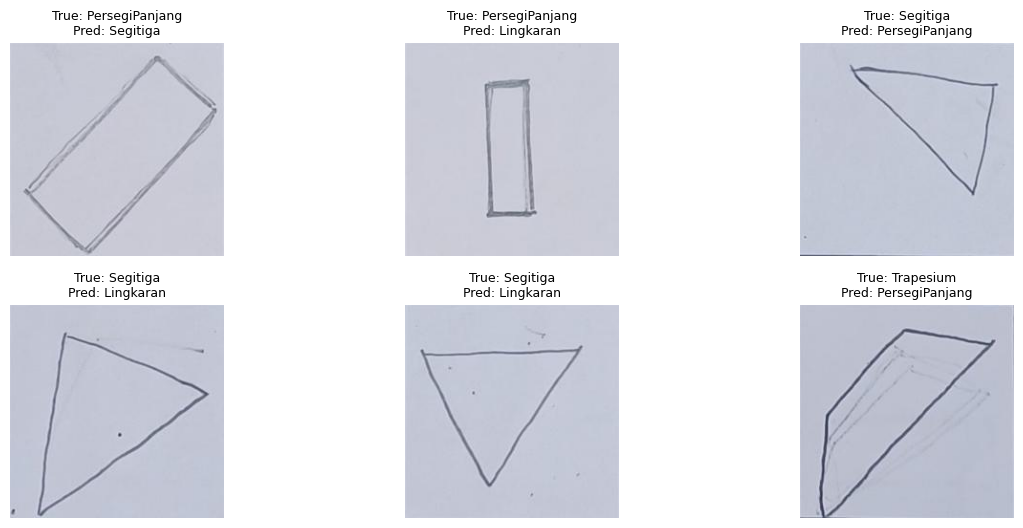

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model

# =========================
# LOAD MODEL
# =========================
model = load_model("/content/drive/MyDrive/shape_dataset/best_model_grayscale_aug_76_5656.h5")

# =========================
# PREDIKSI DATA TEST
# =========================
y_pred_prob = model.predict(val_generator)
y_pred = np.argmax(y_pred_prob, axis=1)
y_true = val_generator.classes

filepaths = val_generator.filepaths
labels = list(val_generator.class_indices.keys())

# =========================
# BUAT DATAFRAME HASIL
# =========================
results_df = pd.DataFrame({
    "filename": [os.path.basename(f) for f in filepaths],
    "true_label": [labels[i] for i in y_true],
    "pred_label": [labels[i] for i in y_pred]
})

results_df["status"] = np.where(
    results_df["true_label"] == results_df["pred_label"],
    "BENAR",
    "SALAH"
)

# =========================
# TAMPILKAN RINGKASAN
# =========================
print("Jumlah BENAR :", (results_df["status"] == "BENAR").sum())
print("Jumlah SALAH :", (results_df["status"] == "SALAH").sum())

print("\nContoh BENAR:")
display(results_df[results_df["status"] == "BENAR"].head(5))

print("\nContoh SALAH:")
display(results_df[results_df["status"] == "SALAH"].head(5))

# =========================
# SIMPAN KE CSV (OPSIONAL)
# =========================
results_df.to_csv(
    "/content/drive/MyDrive/shape_dataset/hasil_prediksi_test_aug.csv",
    index=False
)

# =========================
# VISUALISASI GAMBAR SALAH
# =========================
wrong = results_df[results_df["status"] == "SALAH"]

plt.figure(figsize=(12,8))
for i, idx in enumerate(wrong.index[:9]):
    img = plt.imread(filepaths[idx])
    plt.subplot(3,3,i+1)
    plt.imshow(img, cmap="gray")
    plt.title(
        f"True: {wrong.loc[idx,'true_label']}\nPred: {wrong.loc[idx,'pred_label']}",
        fontsize=9
    )
    plt.axis("off")

plt.tight_layout()
plt.show()

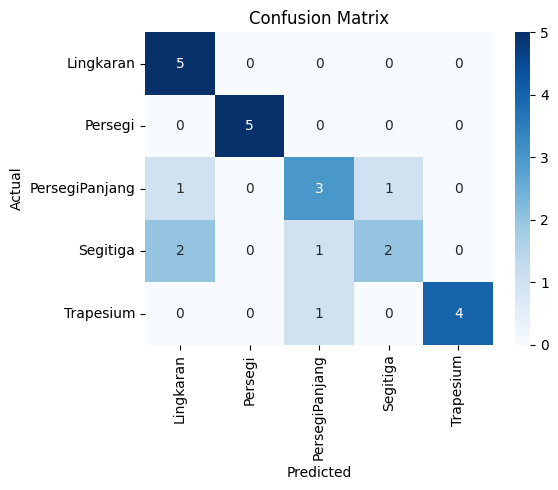

=== METRIK GLOBAL (MACRO) ===
Accuracy : 0.7600
Precision: 0.7783
Recall   : 0.7600
F1-score : 0.7516

=== CLASSIFICATION REPORT ===
                precision    recall  f1-score   support

     Lingkaran     0.6250    1.0000    0.7692         5
       Persegi     1.0000    1.0000    1.0000         5
PersegiPanjang     0.6000    0.6000    0.6000         5
      Segitiga     0.6667    0.4000    0.5000         5
     Trapesium     1.0000    0.8000    0.8889         5

      accuracy                         0.7600        25
     macro avg     0.7783    0.7600    0.7516        25
  weighted avg     0.7783    0.7600    0.7516        25



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (
    confusion_matrix,
    classification_report,
    accuracy_score,
    precision_recall_fscore_support
)

# =========================
# CONFUSION MATRIX
# =========================
cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(6,5))
sns.heatmap(
    cm,
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=labels,
    yticklabels=labels
)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()

# =========================
# METRIK UTAMA
# =========================
accuracy = accuracy_score(y_true, y_pred)

precision, recall, f1, _ = precision_recall_fscore_support(
    y_true,
    y_pred,
    average='macro'   # ⬅️ adil untuk multi-class
)

print("=== METRIK GLOBAL (MACRO) ===")
print(f"Accuracy : {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall   : {recall:.4f}")
print(f"F1-score : {f1:.4f}")

# =========================
# DETAIL PER KELAS
# =========================
print("\n=== CLASSIFICATION REPORT ===")
print(classification_report(
    y_true,
    y_pred,
    target_names=labels,
    digits=4
))
